# Call Geo Engine via API

In [1]:
import io
from datetime import datetime
from zipfile import ZipFile

import geoengine as ge

## Initialize

In [2]:
ge.initialize("http://localhost:3030/api")

## Register workflow

In [3]:
workflow = ge.register_workflow(
    {
        "type": "Vector",
        "operator": {
            "type": "RasterVectorJoin",
            "params": {
                "names": {"type": "names", "values": ["NDVI"]},
                "temporalAggregation": "none",
                "featureAggregation": "mean",
            },
            "sources": {
                "vector": {"type": "OgrSource", "params": {"data": "ne_10m_ports", "attributeProjection": None}},
                "rasters": [{"type": "GdalSource", "params": {"data": "ndvi"}}],
            },
        },
    }
)

workflow

18a38a75-0127-53d0-93d9-b578a5afd7ec

## Get result metadata of workflow

In [4]:
workflow.get_result_descriptor()

Data type:         MultiPoint
Spatial Reference: EPSG:4326
Columns:
  website:
    Column Type: text
    Measurement: unitless
  natlscale:
    Column Type: float
    Measurement: unitless
  name:
    Column Type: text
    Measurement: unitless
  NDVI:
    Column Type: int
    Measurement: vegetation
  featurecla:
    Column Type: text
    Measurement: unitless
  scalerank:
    Column Type: int
    Measurement: unitless

## Get dataframe via WFS

In [5]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_dataframe(
    ge.QueryRectangle(
        ge.BoundingBox2D(-111.533203125, -4.482421875, 114.345703125, 73.388671875), ge.TimeInterval(time, time)
    )
)


data

,geometry,scalerank,name,featurecla,website,natlscale,NDVI,start,end
0,POINT (-69.92356 12.4375),8,Sint Nicolaas,Port,www.rocargo.com/SanNicolas.html,5.0,77.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
1,POINT (-61.8523 17.12278),8,Saint John's,Port,www.ab.gov.ag,5.0,125.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
2,POINT (2.93369 51.23),8,Oostende (Ostend),Port,www.portofoostende.be,5.0,177.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
3,POINT (3.20459 51.33639),8,Zeebrugge,Port,www.zeebruggeport.be,5.0,136.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
4,POINT (27.4583 42.47),8,Burgas,Port,www.port-burgas.com,5.0,138.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
733,POINT (-74.02426 40.68833),3,New York,Port,www.panynj.gov,75.0,82.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
734,POINT (-94.8179 29.30417),3,Galveston,Port,www.portofgalveston.com,75.0,78.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
735,POINT (-76.29252 36.90194),3,Norfolk,Port,www.vaports.com,75.0,136.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
736,POINT (-79.38 43.61),3,Toronto,Port,None,75.0,73.0,2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00


## Plot points colored by NDVI value

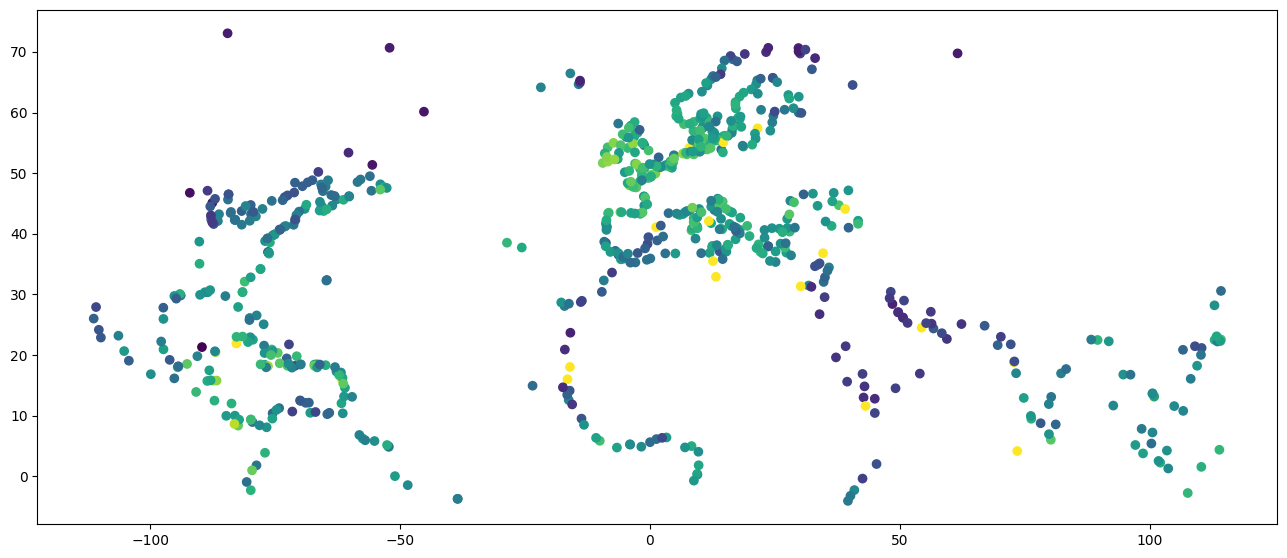

In [6]:
data.plot("NDVI", figsize=(16, 8));

## Getprovenance information from the server

In [7]:
prov_list = workflow.get_provenance()
prov_list

[ProvenanceEntry(data=[29341157-b9fd-4e2d-b3d4-ee1bfe8fa0ae], provenance=Provenance(citation='Natural Earth, Cultural Vectors 10m Ports', license='Public domain by Natural Earth http://www.naturalearthdata.com/about/terms-of-use/', uri='https://www.naturalearthdata.com/downloads/10m-cultural-vectors/ports/')),
 ProvenanceEntry(data=[09900119-81cd-4b47-8290-5dd3c98504d8], provenance=Provenance(citation='Nasa Earth Observations, MODIS Vegetation Index Products', license='https://earthdata.nasa.gov/collaborate/open-data-services-and-software/data-information-policy', uri='https://modis.gsfc.nasa.gov/data/dataprod/mod13.php'))]

## Get all metadata combined in a ZIP file

In [8]:
zip_content = io.BytesIO()  # alternatively, a file path

workflow.metadata_zip(zip_content)

zip_file = ZipFile(zip_content)

zip_file.printdir()

File Name                                             Modified             Size
workflow.json                                  2025-08-13 20:08:14          755
metadata.json                                  2025-08-13 20:08:14         1068
citation.json                                  2025-08-13 20:08:14          834
